In [1]:
import pandas as pd
import numpy as np
import pickle
import sys
sys.path.append('/home/dipika16/CS6203/')
import dataset_loaders.image_classification.pytorch_datasets as pt_dset
from dataset_loaders.image_classification import cars

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [14]:
def get_scores(names, targets):
    names = names.values
    scores = {}
    for i in range(len(names)):
        dataset, model1, model2 = names[i].split('-')
        scores[model1] = scores.get(model1, 0) + (targets[i] >= 0.5)
        scores[model2] = scores.get(model2, 0) + (targets[i] <= 0.5)
    return scores

In [112]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
min_max_scaler = preprocessing.MinMaxScaler()

file_name = "/home/dipika16/CS6203/meta_learning_features/meta_model_learning.csv"

data_frame = pd.read_csv(file_name)

X = data_frame[data_frame.columns[1:-1]]
y = data_frame[data_frame.columns[-1]]
# scaler.fit(X)
X = min_max_scaler.fit_transform(X)
# X = scaler.transform(X)
X = pd.DataFrame(X)

# for col in X.columns:
#     print(X[col].mean(), X[col].std())
    
cifar10_nind = ['Cifar10-' not in name for name in data_frame['name']]
cifar10_ind = ['Cifar10-' in name for name in data_frame['name']]

df_train = data_frame[cifar10_nind]
df_test = data_frame[cifar10_ind]

X_train = X[cifar10_nind]
y_train = y[cifar10_nind]

X_test = X[cifar10_ind]
y_test = y[cifar10_ind]

print(X_train.shape, X_test.shape)

# X_train = min_max_scaler.fit_transform(X_train)
# X_train = pd.DataFrame(X_train)

# X_test = min_max_scaler.fit_transform(X_test)
# X_test = pd.DataFrame(X_test)

# X = data_frame[data_frame.columns[1:-1]]
# y = data_frame[data_frame.columns[-1]]
# # Split dataset into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

model = DecisionTreeClassifier()
clf = model.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

# logistic = LogisticRegression().fit(X_train, y_train)
# y_pred = logistic.predict(X_test)
# y_prob = logistic.predict_proba(X_test)

# from sklearn.svm import SVC
# clf = SVC(gamma='scale')
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

# from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier(n_neighbors=3)
# neigh.fit(X_train, y_train) 
# y_pred = neigh.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# # for name, pred in zip(df_test['name'].values, y_pred):
# #     print(name, pred)
print(get_scores(df_test['name'], y_test.values))
print(get_scores(df_test['name'], y_pred))

# print(X_train)

(336, 21) (56, 21)
Accuracy: 0.8392857142857143
{'vgg16': 6, 'mnasnet0_5': 8, 'shufflenet_v2_x0_5': 12, 'mnasnet1_0': 4, 'resnet34': 10, 'mobilenet_v2': 0, 'resnet18': 14, 'alexnet': 2}
{'vgg16': 4, 'mnasnet0_5': 10, 'shufflenet_v2_x0_5': 12, 'mnasnet1_0': 5, 'resnet34': 9, 'mobilenet_v2': 2, 'resnet18': 12, 'alexnet': 2}


In [111]:
flower_data = ['flower',213,320,3459,6,-1.86356251848787,2.4460253754907946,
 1.6917786061683122,0.22424825848248525,1.6992114774522238,-2.1104607968056857,
 0.6493938801595369,-0.016132741368067128,-0.021700957884821397,0.9723915936409163,
 -2.2470994394874646,-1.1299810723049237,-1.3211149929889237,-0.23125189076593491,0.5577938661654205]
X_test1 = X_test
X_test1.iloc[:,range(19)] = flower_data[1:]
# X_test1.iloc([:,:19]) = flower_data[1:]
print(min_max_scaler.transform(X_test1))
y_pred = clf.predict(X_test)
print(get_scores(df_test['name'], y_pred))

[[ 0.49459459  0.50877193 -0.05715728 ...  1.14140149 -0.00714392
  -0.00714392]
 [ 0.49459459  0.50877193 -0.05715728 ...  1.14140149 -0.00714392
  -0.00714392]
 [ 0.49459459  0.50877193 -0.05715728 ...  1.14140149 -0.00714392
  -0.00714392]
 ...
 [ 0.49459459  0.50877193 -0.05715728 ...  1.14140149 -0.00714392
  -0.00714392]
 [ 0.49459459  0.50877193 -0.05715728 ...  1.14140149 -0.00714392
  -0.00714392]
 [ 0.49459459  0.50877193 -0.05715728 ...  1.14140149 -0.00714392
  -0.00714391]]
{'alexnet': 0, 'shufflenet_v2_x0_5': 11, 'mnasnet0_5': 13, 'resnet18': 9, 'mnasnet1_0': 9, 'mobilenet_v2': 4, 'vgg16': 2, 'resnet34': 8}


In [86]:
with open('/home/dipika16/CS6203/meta_model_pool/DTree_traffic.pkl', 'wb') as modf:
    dict2dump = {'clf' : clf, 'scores': get_scores(df_test['name'], y_pred)}
    pickle.dump(dict2dump, modf)

In [ ]:
pt_dset.load_cifar10('/home/dipika16/CS6203/dataset_pool/', None, 0.2, 10, True)
pt_dset.load_cifar100('/home/dipika16/CS6203/dataset_pool/', None, 0.2, 10, True)
pt_dset.load_KMNIST('/home/dipika16/CS6203/dataset_pool/', None, 0.2, 10, True)
pt_dset.load_FashionMNIST('/home/dipika16/CS6203/dataset_pool/', None, 0.2, 10, True)
pt_dset.load_mnist('/home/dipika16/CS6203/dataset_pool/', None, 0.2, 10, True)
cars.load_cars('/home/dipika16/CS6203/dataset_pool/', None, 0.2, 10)

In [2]:
from meta_model_bin.convert_params_to_dataset import BuildDatasetModelCSV

json_dump_file = "/home/dipika16/CS6203/logs/model_datasets_meta.json"
dataset_features_file = "/home/dipika16/CS6203/meta_learning_features/dataset.csv"
dataset_model_train_file = "/home/dipika16/CS6203/meta_learning_features/meta_model_learning.csv"
models_features_file = "/home/dipika16/CS6203/meta_learning_features/models.csv"
bd = BuildDatasetModelCSV(json_dump_file, dataset_features_file, models_features_file, dataset_model_train_file)
bd.load_and_populate_json_dump()

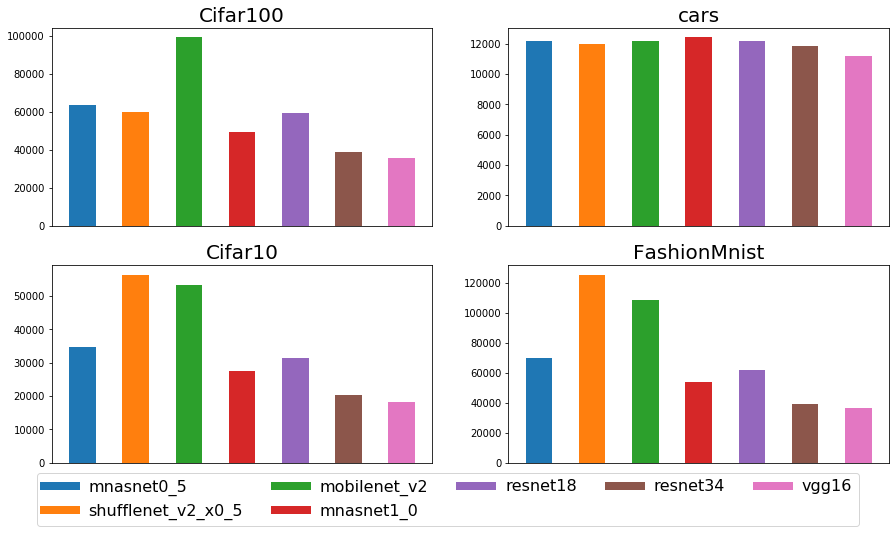

In [81]:
models = ['mnasnet0_5', 'shufflenet_v2_x0_5', 'mobilenet_v2', 'mnasnet1_0', 'resnet18', 'resnet34', 'vgg16']
# models = list(bd.table['Mnist'].keys())
datasets = ['Cifar100', 'cars', 'Cifar10', 'FashionMnist'] # list(bd.table.keys())

from matplotlib import pyplot as plt
# fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig, ax = plt.subplots(figsize=(15, 8))

ind = np.arange(len(models))    # the x locations for the groups
width = 0.5         # the width of the bars
p = [i for i in range(len(datasets))]

for i in range(len(datasets)):
    plt.subplot(2, 2, i+1)
    dataset = datasets[i]
    heights = [bd.table[dataset][model][1] for model in models]
    radii = np.array([bd.table[dataset][model][3] for model in models])
#     radii = 500*radii /sum(radii)
    p[i] = plt.bar(ind, height=heights, width=width, color=['C' + str(j) for j in range(len(models))])
#     p[i] = plt.scatter(x=ind, y=heights, s=radii/(1e4), color=['C' + str(j) for j in range(len(models))])
    plt.xticks([], [])
    plt.title(dataset, fontdict={'size': 20})

from matplotlib.lines import Line2D  
custom_lines = [Line2D([0], [0], color='C0', lw=8),
                Line2D([0], [0], color='C1', lw=8),
                Line2D([0], [0], color='C2', lw=8),
                Line2D([0], [0], color='C3', lw=8),
                Line2D([0], [0], color='C4', lw=8),
                Line2D([0], [0], color='C5', lw=8),
                Line2D([0], [0], color='C6', lw=8)]
fig.legend( custom_lines, models, loc = 'lower center', prop={'size': 16}, ncol=5)
# ax.yaxis.set_units(inch)

plt.show()